# Lab | Cleaning numerical data

Business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from statistics import math

In [2]:
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.shape #9134, 24

(9134, 24)

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()
#there's no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#Renaming the columns

def standard_column_name(df):
    new_column_name=[]
    for column in df.columns:
        column=column.lower()
        column=column.replace(' ','_')
        new_column_name.append(column)
    df.columns = new_column_name
    return df

customer_df=standard_column_name(customer_df)


Notes - def function
1) when defining a function, don't forget to return/print the output
2) applying a function in just a single row > just call the function. Do not use .apply or list(map 
3) applying a function in the full dataframe > add axis=1


In [7]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
#Changing 'effective_to_date' format (datetime)
customer_df['effective_to_date']= pd.to_datetime(customer_df.effective_to_date)


In [9]:
customer_df['effective_to_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


In [10]:
#Checking missing values per column
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
customer_df.select_dtypes(object)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
#7.Define a functions that given an input dataframe, returns two dataframes: 
#one with the numerical columns and another with categorical columns of the input dataframe.

def df_by_category(df):
    numerical_df = df.select_dtypes(np.number)
    categorical_df = df.select_dtypes(object)
    return categorical_df, numerical_df

categorical_df,numerical_df=df_by_category(customer_df)

In [13]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [14]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [16]:
#8.Drop any ID column.

categorical_df = categorical_df.drop(['customer'], axis=1)


<AxesSubplot:>

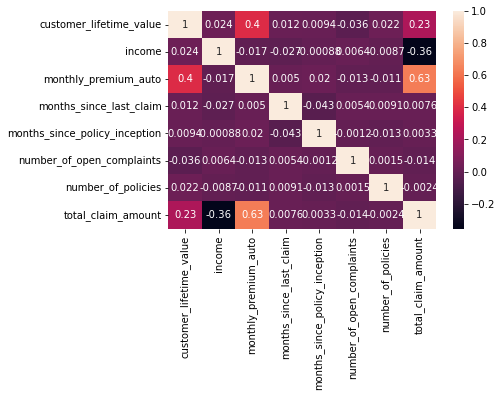

In [17]:
#9.Get the correlation matrix for the numerical variables.
#What is pair of numerical variables that have the highest correlation? It makes sense, why?

correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)


#The highest correlation is between 'monthly_premium_auto' and 'total_claim_amount', corresponding to 0.63.
#They have positive correlation because there's more chance that if you pay more for your insurance you have a more expensive car,
#therefore, you have a higher purchase power and are able to donate more.

In [18]:
#10.Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
#the first containing numerical continuous columns and 
#the second containing numerical discrete columns of the input dataframe. 
#To this end, it might be helpful to count the number of unique values. 
#The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. 
#Then, use it to create two new dataframes: continuous_df and discrete_df.


def numerical_type(df):

    col_name_dis=[]
    col_name_con=[]
    for col in df:
        if df[col].nunique() > 36:
            col_name_con.append(col)
        else:
            col_name_dis.append(col)
    discrete_df = df.loc[:,col_name_dis]
    continuous_df = df.loc[:,col_name_con]
    return discrete_df, continuous_df 

    
discrete_df,continuous_df=numerical_type(numerical_df)

continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


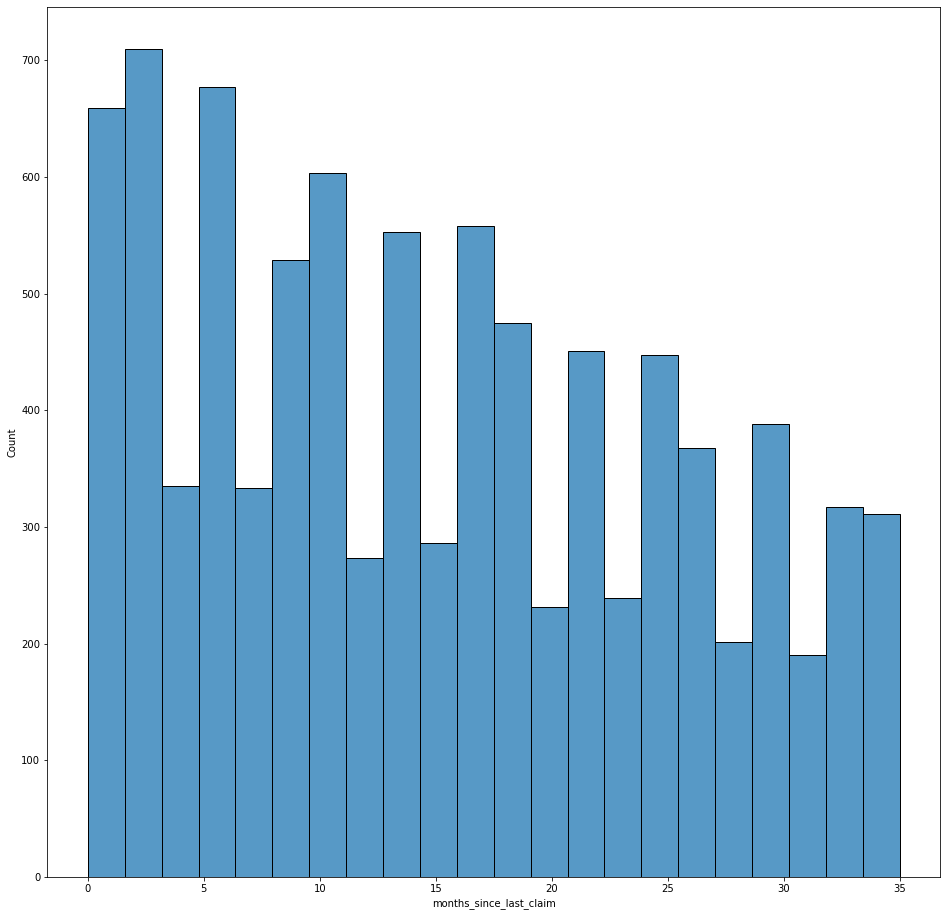

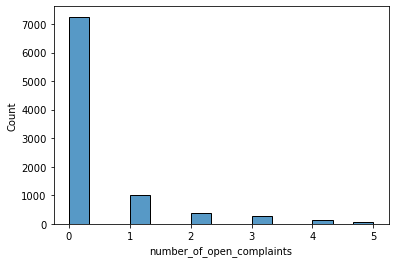

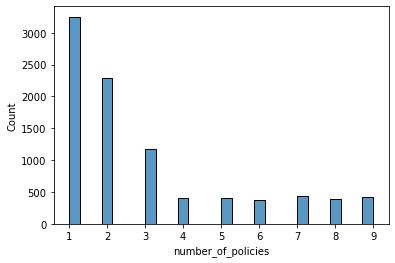

In [19]:
#11.Create a function to create a barplot for all the columns of the discrete_df using seaborn, 
#and set the figuresize = (16,16).

def plot_barplot(df):
    fig = plt.subplots(figsize=(16,16))
    for col in df:
        sns.histplot(df[col])
        plt.show()

plot_barplot(discrete_df)

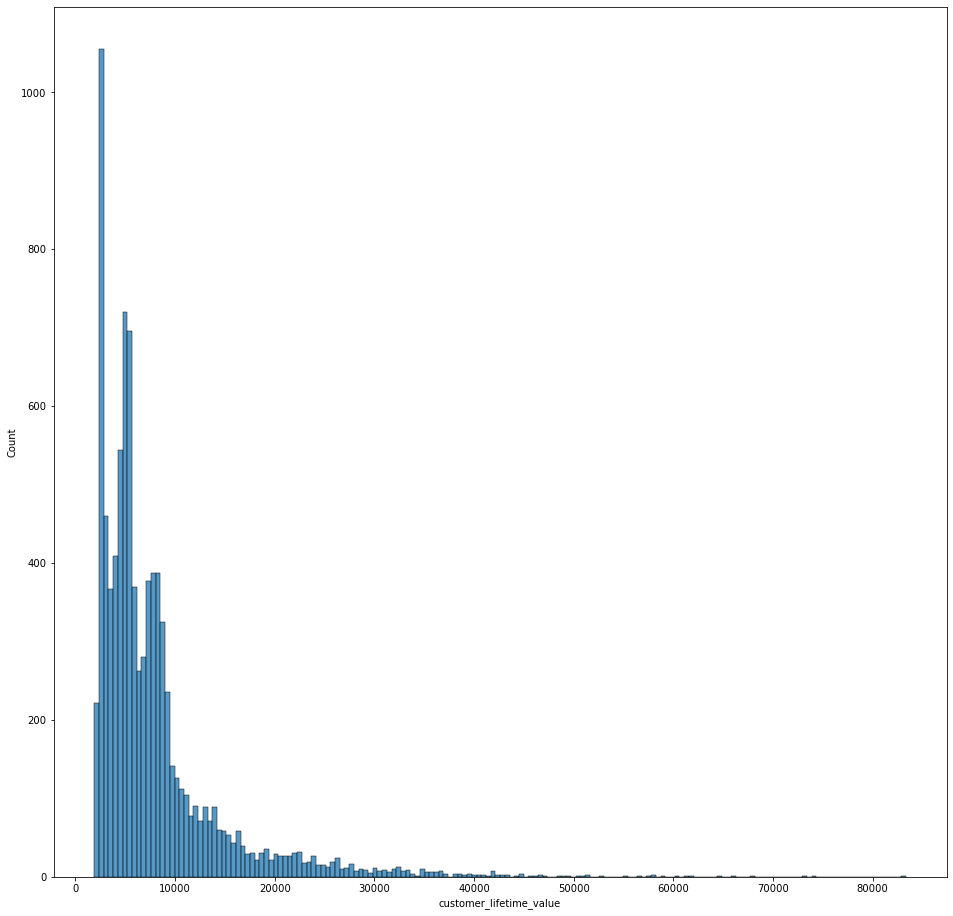

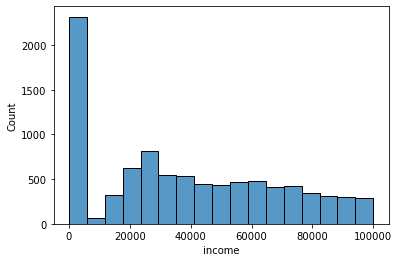

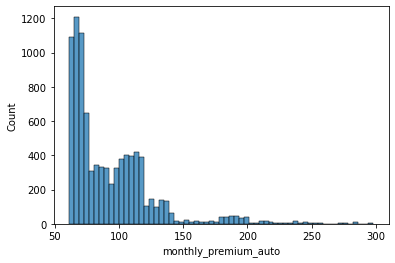

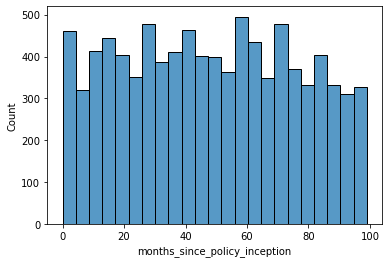

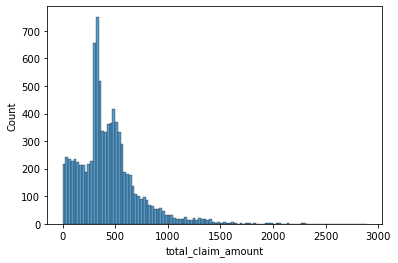

In [20]:
#12.Create a function to create a histogram for all the columns of the continuous_df using seaborn, 
#and set the figuresize = (16,16)

def plot_histogram(df):
    fig = plt.subplots(figsize=(16,16))
    for col in df:
        sns.histplot(df[col])
        plt.show()

plot_histogram(continuous_df)

#13.According to the previous histogram plots, do you think that you do will have to apply any transformation?
Yes, I'd apply a scaler to have all the variables in the same range and unit.
Also, as some columns have positive skewness I'd apply a transformer.


/Users/estelaoshiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


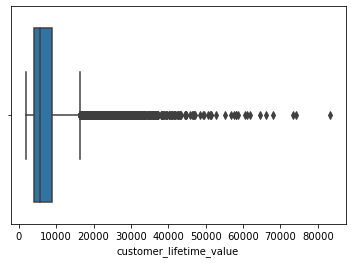

/Users/estelaoshiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


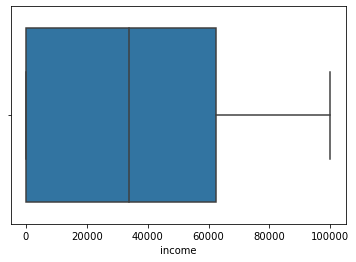

/Users/estelaoshiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


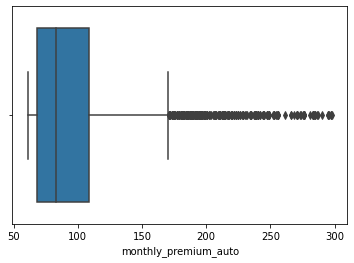

/Users/estelaoshiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


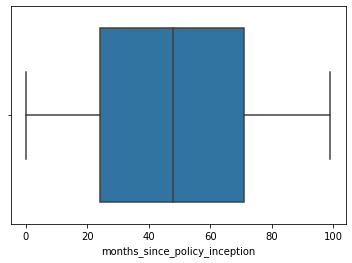

/Users/estelaoshiro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


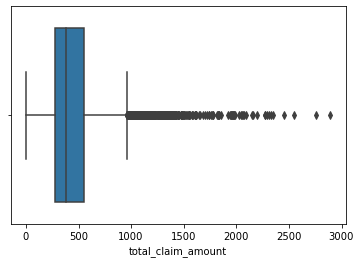

In [21]:
#14.Look for outliers in the continuous variables that you have found. 
#Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.


def plot_boxplot(df):
    for col in df:
        sns.boxplot(df[col])
        plt.show()
        
plot_boxplot(continuous_df)


# Lab | Cleaning categorical data

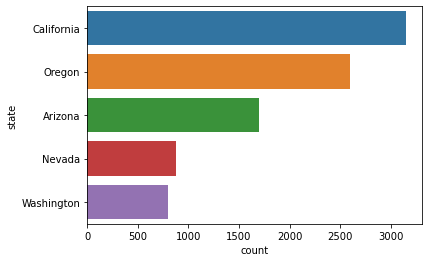

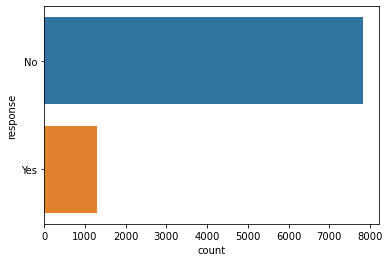

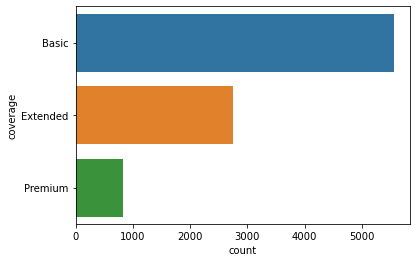

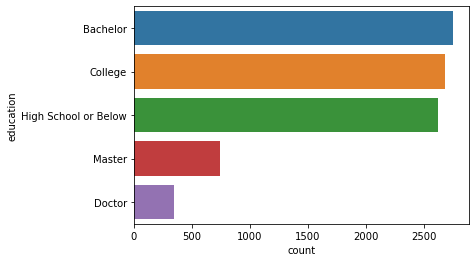

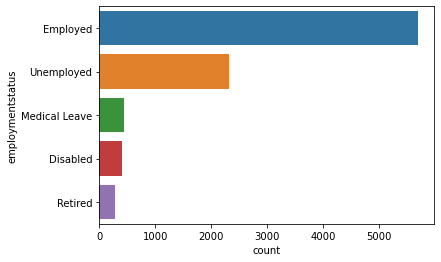

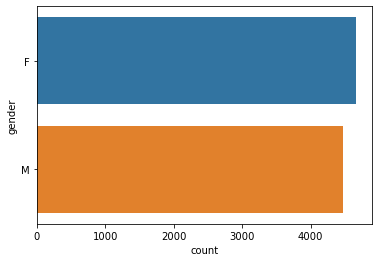

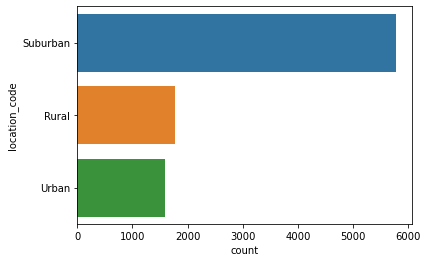

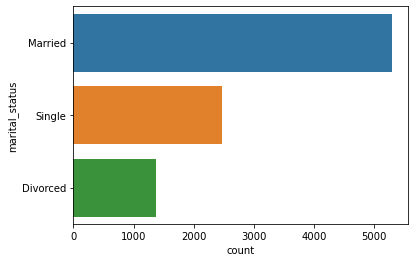

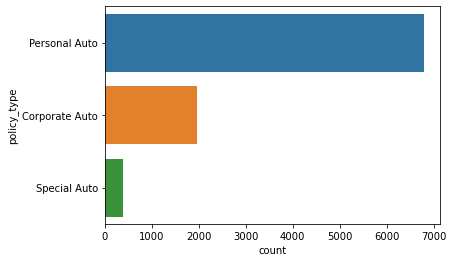

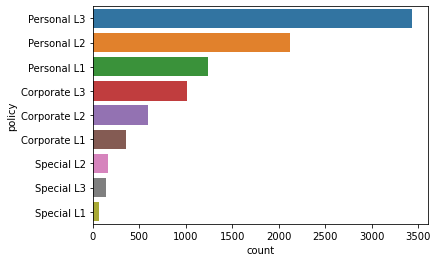

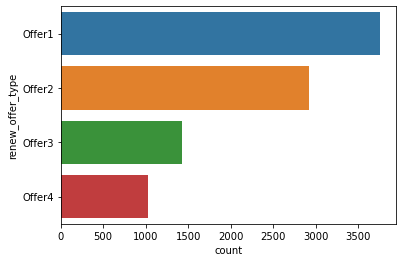

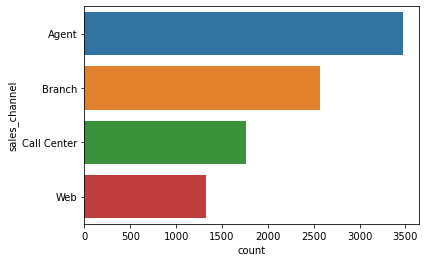

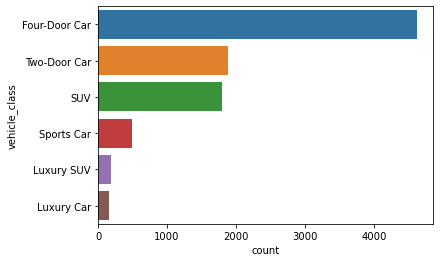

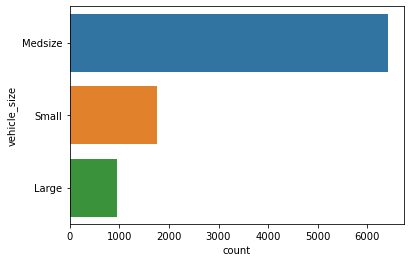

In [22]:
#1.Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. 
#Make sure to sort the bars by frequency ie: the most frequent values should be placed first. 
#Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, 
#the corresponding countplot should have the bars placed in the y axis instead of the x one.

def plot_countplot(df):
    for col in df:
        sns.countplot(data=df, y=col, order= df[col].value_counts(dropna=False).index)
        plt.show()
    
plot_countplot(categorical_df)



In [23]:
#2. policy_type and policy columns are redundant, and what's worse 
#policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with a OneHotEncoder 
#because we will increase a lot the number of columns in the dataframe. 
#Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

categorical_df.drop(['policy_type'],axis=1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


In [24]:
categorical_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [25]:
def clean_policy(policy):
    '''
    L1 - Corporate L1, Personal L1, Special L1
    L2 - Corporate L2, Personal L2, Special L2
    L3 - Corporate L3, Personal L3, Special L3
    '''
    if policy in ['Corporate L1', 'Personal L1', 'Special L1']:
        return "L1"
    elif policy in ['Corporate L2', 'Personal L2', 'Special L2']:
        return "L2"
    else:
        return "L3"

categorical_df['policy'] = categorical_df['policy'].apply(clean_policy)

In [26]:
categorical_df['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

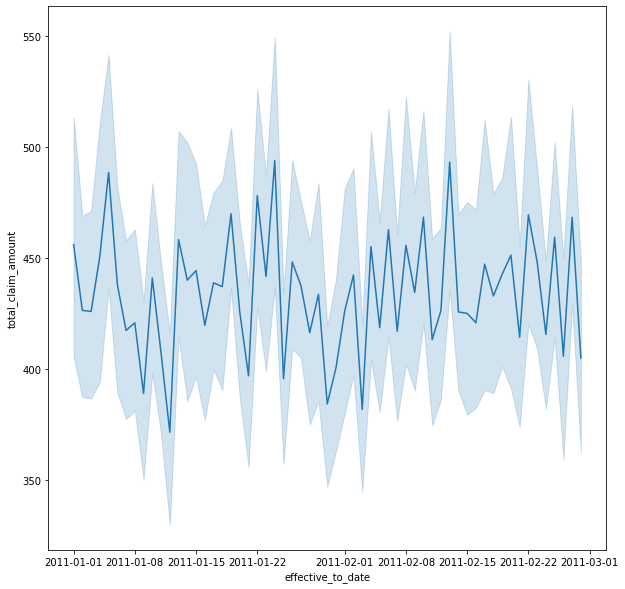

In [27]:
#3.Time dependency analysis. Use a seaborn lineplot using the column effective_to_date to see 
#if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)


fig = plt.subplots(figsize=(10,10))
sns.lineplot(data=customer_df, x=(customer_df['effective_to_date']), y=(customer_df['total_claim_amount']))
plt.show()

In [28]:
#4.To continue the analysis define an empty pandas DataFrame, and add the following new columns:
# day with the day number of effective_to_date
# day_name with the day NAME of effective_to_date
# week with the week of effective_to_date
# month with the month NAME of effective_to_date
# total_claim_amount with total_claim_amount

date_claim_amount=pd.DataFrame
date_claim_amount=customer_df.loc[:,['total_claim_amount','effective_to_date']]
date_claim_amount

,total_claim_amount,effective_to_date
0,384.811147,2011-02-24
1,1131.464935,2011-01-31
2,566.472247,2011-02-19
3,529.881344,2011-01-20
4,138.130879,2011-02-03
...,...,...
9129,198.234764,2011-02-10
9130,379.200000,2011-02-12
9131,790.784983,2011-02-06
9132,691.200000,2011-02-03


In [29]:
date_claim_amount['number_day']=date_claim_amount['effective_to_date'].dt.dayofweek
date_claim_amount

,total_claim_amount,effective_to_date,number_day
0,384.811147,2011-02-24,3
1,1131.464935,2011-01-31,0
2,566.472247,2011-02-19,5
3,529.881344,2011-01-20,3
4,138.130879,2011-02-03,3
...,...,...,...
9129,198.234764,2011-02-10,3
9130,379.200000,2011-02-12,5
9131,790.784983,2011-02-06,6
9132,691.200000,2011-02-03,3


In [30]:
def transform_number_day(x):
        if x == 0:
            return 'Monday'
        elif x == 1:
            return 'Tuesday'
        elif x == 2:
            return 'Wednesday'
        elif x == 3:
            return 'Thursday'
        elif x == 4:
            return 'Friday'
        elif x == 5:
            return 'Saturday'
        else:
            return 'Sunday'


        
date_claim_amount['day_name'] = date_claim_amount['number_day'].apply(transform_number_day)
        

In [31]:
date_claim_amount['week_number'] = date_claim_amount['effective_to_date'].dt.isocalendar().week


In [32]:
date_claim_amount['month'] = date_claim_amount['effective_to_date'].dt.month_name()

In [33]:
date_claim_amount['total_claim_amount']=customer_df['total_claim_amount']

In [34]:
date_claim_amount

,total_claim_amount,effective_to_date,number_day,day_name,week_number,month
0,384.811147,2011-02-24,3,Thursday,8,February
1,1131.464935,2011-01-31,0,Monday,5,January
2,566.472247,2011-02-19,5,Saturday,7,February
3,529.881344,2011-01-20,3,Thursday,3,January
4,138.130879,2011-02-03,3,Thursday,5,February
...,...,...,...,...,...,...
9129,198.234764,2011-02-10,3,Thursday,6,February
9130,379.200000,2011-02-12,5,Saturday,6,February
9131,790.784983,2011-02-06,6,Sunday,5,February
9132,691.200000,2011-02-03,3,Thursday,5,February


In [35]:
#5.Compute the total target column aggregated day_name rounded to two decimals and then 
#reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

x=np.round(date_claim_amount.pivot_table(values =['total_claim_amount'], index=['day_name'], aggfunc='sum').reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),2)
x

,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


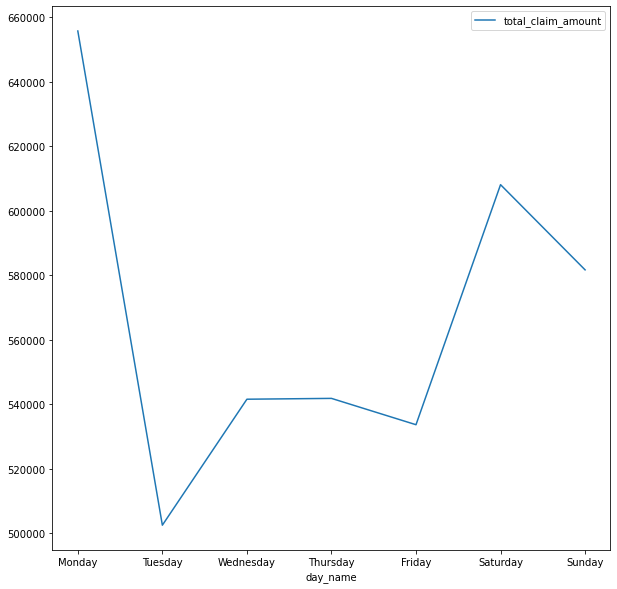

In [36]:
#6. Use a seaborn lineplot to plot the previous series. Do you see some differences by day of the week?
fig = plt.subplots(figsize=(10,10))
sns.lineplot(data=x)
plt.show()

#The lineplot shows that there's a peak on donations on Monday, while Tuesday is the day with the lowest amount of donation.

In [37]:
#7.Get the total number of claims by day of the week name and then 
#reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

y=date_claim_amount.pivot_table(values =['total_claim_amount'], index=['day_name'], aggfunc='count').reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

y

,total_claim_amount
day_name,
Monday,1530
Tuesday,1162
Wednesday,1221
Thursday,1249
Friday,1245
Saturday,1397
Sunday,1330


In [38]:
#8.Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

z=date_claim_amount.pivot_table(values =['total_claim_amount'], index=['day_name'], aggfunc='median').sort_values(by='total_claim_amount', ascending=False)[['total_claim_amount']]
z

,total_claim_amount
day_name,
Thursday,395.328407
Wednesday,392.235698
Monday,385.735705
Sunday,383.721164
Saturday,379.200000
Tuesday,378.490829
Friday,371.803029


In [39]:
z['day_name']=z.index

z

,total_claim_amount,day_name
day_name,,
Thursday,395.328407,Thursday
Wednesday,392.235698,Wednesday
Monday,385.735705,Monday
Sunday,383.721164,Sunday
Saturday,379.200000,Saturday
Tuesday,378.490829,Tuesday
Friday,371.803029,Friday


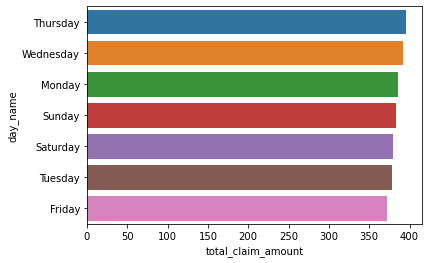

In [40]:
#9.Plot the median "target" by day of the week name using a seaborn barplot
sns.barplot(x='total_claim_amount', y='day_name', data=z)
plt.show()

10. What do you can conclude from this analysis?

Although the total claim amount is higher on Monday, the higher median is on Thursday. Monday has the biggest overall amount because it's also the day with more donations.


In [41]:
#11. Compute the total target column aggregated month rounded to two decimals and then 
#reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

np.round(date_claim_amount.pivot_table(values =['total_claim_amount'], index=['month'], aggfunc='sum'),2).reindex(['January','February'])



,total_claim_amount
month,
January,2117142.86
February,1847824.19


12.Can you do a monthly analysis given the output of the previous series? Why?
No, there's not enough informatio for analysis.
The only possible thing to say is that January had the highest claim amount.

In [42]:
#13. Define a function to remove the outliers of a numerical continuous column 
#depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
def find_range(df):
    max_value = df.mean()+3*df.std()
    min_value = df.mean()-3*df.std()
    return min_value, max_value

def replace_outliers(x):
    min_value
    max_value
    if min_value <= x <= max_value:
        return x
    else:
        return np.NaN

In [43]:
min_max=continuous_df.apply(find_range, axis=0)
min_max

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,-12607.96235,-53482.334193,-10.004612,-35.653379,-437.411481
1,28617.84330,128797.094210,196.443193,131.782566,1305.589070


In [44]:
#14.Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

min_value = min_max.iloc[0,0]
max_value = min_max.iloc[1,0]
continuous_df_clean=continuous_df.loc[:,['customer_lifetime_value']]
continuous_df_clean['customer_lifetime_value']=continuous_df['customer_lifetime_value'].apply(replace_outliers)

In [45]:
min_value = min_max.iloc[0,1]
max_value = min_max.iloc[1,1]
continuous_df_clean['income']=continuous_df.loc[:,['income']]
continuous_df_clean['income']=continuous_df['income'].apply(replace_outliers)

In [46]:
min_value = min_max.iloc[0,2]
max_value = min_max.iloc[1,2]
continuous_df_clean['monthly_premium_auto']=continuous_df.loc[:,['monthly_premium_auto']]
continuous_df_clean['monthly_premium_auto']=continuous_df['monthly_premium_auto'].apply(replace_outliers)

In [47]:
min_value = min_max.iloc[0,3]
max_value = min_max.iloc[1,3]
continuous_df_clean['months_since_policy_inception']=continuous_df.loc[:,['months_since_policy_inception']]
continuous_df_clean['months_since_policy_inception']=continuous_df['months_since_policy_inception'].apply(replace_outliers)

In [48]:
min_value = min_max.iloc[0,0]
max_value = min_max.iloc[1,0]
continuous_df_clean['total_claim_amount']=continuous_df.loc[:,['total_claim_amount']]
continuous_df_clean['total_claim_amount']=continuous_df['total_claim_amount'].apply(replace_outliers)

In [49]:
continuous_df_clean.isna().sum()

customer_lifetime_value          211
income                             0
monthly_premium_auto             200
months_since_policy_inception      0
total_claim_amount                 0
dtype: int64

In [50]:
#15.Concatenate the continuous_cleaned_df, discrete_df, categorical_df and the relevant column of c. 
#As after removing outliers the continuous_cleaned dataframe will have less rows (when you concat the individual dataframes using using pd.concat())
#the resulting dataframe will have NaN's because of the different sizes of each dataframe. 
#Use pd.dropna() and .reset_index() to fix the final dataframe.

final_data=pd.concat([continuous_df_clean,discrete_df,categorical_df],axis=1)

final_data['month']=date_claim_amount['month']
final_data['day_name']=date_claim_amount['day_name']

In [51]:
final_data=final_data.dropna(axis=0)

final_data.reset_index()

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,day_name
0,0,2763.519279,56274,69.0,5,384.811147,32,0,1,Washington,...,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,February,Thursday
1,1,6979.535903,0,94.0,42,1131.464935,13,0,8,Arizona,...,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,January,Monday
2,2,12887.431650,48767,108.0,38,566.472247,18,0,2,Nevada,...,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,February,Saturday
3,3,7645.861827,0,106.0,65,529.881344,18,0,7,California,...,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,January,Thursday
4,4,2813.692575,43836,73.0,44,138.130879,12,0,1,Washington,...,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,February,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,9129,23405.987980,71941,73.0,89,198.234764,18,0,2,California,...,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,February,Thursday
8749,9130,3096.511217,21604,79.0,28,379.200000,14,0,1,California,...,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,February,Saturday
8750,9131,8163.890428,0,85.0,37,790.784983,9,3,2,California,...,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,February,Sunday
8751,9132,7524.442436,21941,96.0,3,691.200000,34,0,3,California,...,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,February,Thursday


In [52]:
#16.Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

#final_data.columns
final_data=final_data[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'month', 'day_name', 'total_claim_amount']]

In [53]:
#17.Turn the response column values into (Yes=1/No=0).

final_data['response']=final_data['response'].replace(('Yes','No'),(1,0))

final_data['response']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: response, Length: 8753, dtype: int64

In [54]:
#18.Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. 
#In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

def clean_education(x):
    '''
    Graduate = Master, Doctor
    '''
    if x in ['Master','Doctor']:
        return "Graduate"
    else:
        return x

final_data['education'] = final_data['education'].apply(clean_education)

final_data['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

In [55]:
#19.Reduce the class imbalance of employmentstatus grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" 
#while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

def clean_employmentstatus(x):
    '''
    Inactive = "Medical Leave", "Disabled", "Retired"
    '''
    if x in ["Medical Leave", "Disabled", "Retired"]:
        return "Inactive"
    else:
        return x

final_data['employmentstatus'] = final_data['employmentstatus'].apply(clean_employmentstatus)

final_data['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [56]:
#20.Deal with column Gender turning the values into (1/0).

final_data['gender']=final_data['gender'].replace(('F','M'),(1,0))

final_data['gender'].unique()

array([1, 0])

In [57]:
#21. Now, deal with c grouping together "Sports Car", "Luxury SUV", "Luxury Car" into a commoun group called Luxury 
#leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of loosing level of detail.

def clean_vehicle_class(x):
    '''
    Luxury = "Sports Car", "Luxury SUV", "Luxury Car"
    '''
    if x in ["Sports Car", "Luxury SUV", "Luxury Car"]:
        return "Luxury"
    else:
        return x

final_data['vehicle_class'] = final_data['vehicle_class'].apply(clean_vehicle_class)

final_data['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [58]:
#22.Now it's time to deal with the categorical ordinal columns, asigning a numerical value to each unique value respecting the ìmplicit ordering`. 
#Encode the coverage: "Premium" > "Extended" > "Basic".
final_data2 = final_data.copy()
coverage_dict ={"Premium": 3, "Extended":2, "Basic":1}
final_data2['ordinal_coverage'] = final_data2.coverage.map(coverage_dict) 
final_data2[['coverage', 'ordinal_coverage']]

,coverage,ordinal_coverage
0,Basic,1
1,Extended,2
2,Premium,3
3,Basic,1
4,Basic,1
...,...,...
9129,Basic,1
9130,Extended,2
9131,Extended,2
9132,Extended,2


In [59]:
#23.Encode employmentstatus: "Employed" > "Inactive" > "Unemployed".
employmentstatus_dict ={"Employed": 3, "Inactive":2, "Unemployed":1}
final_data2['ordinal_employmentstatus'] = final_data2.employmentstatus.map(employmentstatus_dict) 
final_data2[['employmentstatus', 'ordinal_employmentstatus']]


,employmentstatus,ordinal_employmentstatus
0,Employed,3
1,Unemployed,1
2,Employed,3
3,Unemployed,1
4,Employed,3
...,...,...
9129,Employed,3
9130,Employed,3
9131,Unemployed,1
9132,Employed,3


In [60]:
#24.Encode location code: "Urban" > "Suburban" > "Rural".
location_code_dict ={"Urban": 3, "Suburban":2, "Rural":1}
final_data2['ordinal_location_code'] = final_data2.location_code.map(location_code_dict) 
final_data2[['location_code', 'ordinal_location_code']]

,location_code,ordinal_location_code
0,Suburban,2
1,Suburban,2
2,Suburban,2
3,Suburban,2
4,Rural,1
...,...,...
9129,Urban,3
9130,Suburban,2
9131,Suburban,2
9132,Suburban,2


In [61]:
#25.Encode vehicle size: "Large" > "Medsize" > "Small".
vehicle_size_dict ={"Large": 3, "Medsize":2, "Small":1}
final_data2['ordinal_vehicle_size'] = final_data2.vehicle_size.map(vehicle_size_dict) 
final_data2[['vehicle_size', 'ordinal_vehicle_size']]

,vehicle_size,ordinal_vehicle_size
0,Medsize,2
1,Medsize,2
2,Medsize,2
3,Medsize,2
4,Medsize,2
...,...,...
9129,Medsize,2
9130,Medsize,2
9131,Medsize,2
9132,Large,3


In [62]:
#26. Get a dataframe with the categorical nominal columns
cat_nominal_df=final_data[['state','sales_channel','marital_status','policy_type']]

In [63]:
#27. Create a list named levels which has as many elements as categorical nominal columns. 
#Each element must be another list with all the possible unique values of the corresponding categorical nominal column

# state_unique = cat_nominal_df['state'].unique().tolist()
# sales_channel = cat_nominal_df['sales_channel'].unique().tolist()
# marital_status = cat_nominal_df['marital_status'].unique().tolist()
# policy_type = cat_nominal_df['policy_type'].unique().tolist()

# levels = [state_unique,sales_channel,marital_status,policy_type]

levels = [list(cat_nominal_df[col].unique()) for col in cat_nominal_df.columns]

In [64]:
#28.Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels
y=final_data['total_claim_amount']
X=cat_nominal_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

X_train_categorical = X_train
X_test_categorical  = X_test

encoder = OneHotEncoder(drop='first', categories=levels)
encoder.fit(X_train_categorical)

X_train_cat_np = encoder.transform(X_train_categorical).toarray()
X_test_cat_np  = encoder.transform(X_test_categorical).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_np, columns=encoder.get_feature_names_out())
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_np,  columns=encoder.get_feature_names_out())

X_train_cat_encoded_df.head()

,state_Arizona,state_Nevada,state_California,state_Oregon,sales_channel_Call Center,sales_channel_Web,sales_channel_Branch,marital_status_Single,marital_status_Divorced,policy_type_Personal Auto,policy_type_Special Auto
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Lab | Comparing regression models


1.Define X and y
2.Import sklearn train_test_split and separate the data. Set test_size=0.30 and random_state=31
3.Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
4.Encode the categorical variables X_train_cat and X_test_cat using the OneHotEncoder setup in the previous lab. Remember to use .toarray() after .transform() to endup with a numpy array. Next, cast the resulting numpy arrays into pandas DataFrames. Make sure that the column names of the new dataframes are correctly setup using encoder.get_feature_names_out() and the same indexes of X_train_cat and X_test_cat

In [65]:
#5. Use X_train_num to fit a power transformer. Transform BOTH X_train_num and X_test_num. 
#Next, cast the resulting numpy arrays as pandas dataframes. Make sure to set the correct columns names 
#and to use the same indexes of X_train_num and X_test_num. Name the final resulting dataframes as: 
#X_train_num_transformed_df and X_test_num_transformed_df

y=final_data['total_claim_amount']
X=final_data.select_dtypes(np.number)
X=X.drop(['response', 'gender','total_claim_amount'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

X_train_num = X_train
X_test_num  = X_test

transformer = PowerTransformer()
transformer.fit(X_train)

X_train_num_np = transformer.transform(X_train_num)
X_test_num_np  = transformer.transform(X_test_num)

X_train_num_transformed_df = pd.DataFrame(X_train_num_np, columns=transformer.get_feature_names_out())
X_test_num_transformed_df  = pd.DataFrame(X_test_num_np,  columns=transformer.get_feature_names_out())


X_train_num_transformed_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies
0,-0.543695,0.086446,-1.243211,-1.532733,1.053899,2.026683,1.556458
1,-0.210993,0.096750,-1.151951,-0.103260,-0.831609,-0.508927,1.556458
2,0.025366,0.489151,-0.461573,0.399898,-0.700609,-0.508927,1.556458
3,-0.571228,0.735360,0.821604,1.275691,-1.122407,-0.508927,-1.151802
4,-1.175073,0.699125,0.052908,-0.392552,0.980224,2.023598,-1.151802


In [66]:
#6.Concat X_train_num_transformed_df and X_train_cat_encoded_df into X_train_new and
#X_test_num_transformed_df and X_test_cat_encoded_df into X_test_new

X_train_new = pd.concat([X_train_num_transformed_df,X_train_cat_encoded_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df,X_test_cat_encoded_df], axis=1)

In [67]:
#7. Fit a MinMax scaler using X_train_new and transform X_train_new and X_test_new. 
#Create new pandas dataframes from the resulting numpy arrays. 
#Remember to set the correct columns names and indexes. 
#Name the resulting dataframes as: X_train_new_scaled_df and X_test_new_scaled_df

X_train_new = X_train.select_dtypes(include = np.number)
X_test_new  = X_test.select_dtypes(include = np.number)

#Scaling data
transformer = MinMaxScaler().fit(X_train_new) 

X_train_scaled = transformer.transform(X_train_new)
X_test_scaled  = transformer.transform(X_test_new)

X_train_new_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_new.columns)
X_test_new_scaled_df  = pd.DataFrame(X_test_scaled, columns=X_test_new.columns)

X_train_new_scaled_df.shape

(6127, 7)

In [68]:
#8.Train a simple linear regression model using X_train_new_scaled_df, and get the predictions for the train and test sets

lm = LinearRegression()
lm.fit(X_train_new_scaled_df,y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)


y_pred_train = lm.predict(X_train_new_scaled_df)
y_pred_test = lm.predict(X_test_new_scaled_df)

print(y_pred_train)
print(y_pred_test)

[339.67767418 350.6164395  327.94367591 ... 356.98445498 530.17023194
 247.31064556]
[366.63439535 257.13097334 392.85694434 ... 501.8796859  372.13442152
 182.68718892]


In [69]:
#9.Create a function that given a model prediction and real values returns 
#a pandas dataframe with the following table:

def mape(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))
    return mape

def calc_error_metric(y_test,y_pred_test):
    '''
    Libraries: from sklearn.metrics import mean_absolute_error, r2_score
    import numpy as np
    
    '''
    MAE=mean_absolute_error(y_test, y_pred_test)
    MSE=mean_squared_error(y_test, y_pred_test)
    RMSE=math.sqrt(MSE)
    MAPE=mape(y_test, y_pred_test)
    R2=r2_score(y_test, y_pred_test)

    error_data={'Error_Metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], 
                'Value': [MAE, MSE, RMSE, MAPE, R2]}
          
    error_metric_df=pd.DataFrame.from_dict(error_data)
    return error_metric_df

In [70]:
#10.Evaluate the linear model predictions using the previous function on the TRAIN and TEST sets
calc_error_metric(y_test,y_pred_test)

,Error_Metric,Value
0,MAE,136.262992
1,MSE,34749.185777
2,RMSE,186.411335
3,MAPE,1.788516
4,R2,0.473467


In [71]:
calc_error_metric(y_train,y_pred_train)

,Error_Metric,Value
0,MAE,141.749733
1,MSE,38144.643363
2,RMSE,195.306537
3,MAPE,2.463377
4,R2,0.428480


In [72]:
#11. Now define a function that takes as an input: list of models, X_train and y_train 
#to train several model (with default values) so we can train a lot of them without repeating code. 
#The function must return the list of trained models.

def train_model(list_models,X_train,y_train):
    list_models
    for model in list_models:
        if model == 'LinearRegression':
            lr = LinearRegression().fit(X_train,y_train)
            return lr
        elif model == 'KNeighborsRegressor':
            knn = KNeighborsRegressor.fit(X_train, y_train)
            return knn
        elif model == 'MLPRegressor':
            regr = MLPRegressor.fit(X_train, y_train)
            return regr
            
#???????????????
    


In [73]:
#12.Use the function to train the following models (with default settings):
# *LinearRegressor

# *KNeighborsRegressor

# *MLPRegressor

In [74]:
#13.Evaluate the models with the function created earlier in the TRAIN and TEST sets. Which model performs best with the default options?
